* Import modules
* Import dataset from sklearn.datasets -- if you want to use the online version of the dataset 

In [101]:
import keras
import numpy as np
import pandas as pd
#from sklearn.datasets import load_breast_cancer # online dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

* Load dataset
* Data process
* Check results

In [102]:
'''
# online dataset
data = load_breast_cancer()
X = data.data
y = data.target
'''

data = pd.read_csv('.data/data.csv')

#delete all NaN column 
data.dropna(how='all', axis=1, inplace=True)

# replace M with 0 and B with 1 for binary analysis
data['diagnosis'] = (data['diagnosis'] == 'B').astype(int)

X = data.drop(['diagnosis'], axis=1).values
y = data['diagnosis'].values

print(X)
print('------------------------------------------------------')
print(y)

print('------------------------------------------------------')
print('------------------------------------------------------')

na_count = data.isna().sum()
print(na_count)

print(data)



[[8.4230200e+05 1.7990000e+01 1.0380000e+01 ... 2.6540000e-01
  4.6010000e-01 1.1890000e-01]
 [8.4251700e+05 2.0570000e+01 1.7770000e+01 ... 1.8600000e-01
  2.7500000e-01 8.9020000e-02]
 [8.4300903e+07 1.9690000e+01 2.1250000e+01 ... 2.4300000e-01
  3.6130000e-01 8.7580000e-02]
 ...
 [9.2695400e+05 1.6600000e+01 2.8080000e+01 ... 1.4180000e-01
  2.2180000e-01 7.8200000e-02]
 [9.2724100e+05 2.0600000e+01 2.9330000e+01 ... 2.6500000e-01
  4.0870000e-01 1.2400000e-01]
 [9.2751000e+04 7.7600000e+00 2.4540000e+01 ... 0.0000000e+00
  2.8710000e-01 7.0390000e-02]]
------------------------------------------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1

* Split the data into train and test subsets

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("TRAIN")
print(X_train)
print("TEST")
print(X_test)

TRAIN
[[8.594710e+05 9.029000e+00 1.733000e+01 ... 1.750000e-01 4.228000e-01
  1.175000e-01]
 [8.735930e+05 2.109000e+01 2.657000e+01 ... 2.903000e-01 4.098000e-01
  1.284000e-01]
 [8.591960e+05 9.173000e+00 1.386000e+01 ... 5.087000e-02 3.282000e-01
  8.490000e-02]
 ...
 [8.910721e+06 1.429000e+01 1.682000e+01 ... 3.333000e-02 2.458000e-01
  6.120000e-02]
 [9.084890e+05 1.398000e+01 1.962000e+01 ... 1.827000e-01 3.179000e-01
  1.055000e-01]
 [8.629650e+05 1.218000e+01 2.052000e+01 ... 7.431000e-02 2.694000e-01
  6.878000e-02]]
TEST
[[8.7930000e+04 1.2470000e+01 1.8600000e+01 ... 1.0150000e-01
  3.0140000e-01 8.7500000e-02]
 [8.5957500e+05 1.8940000e+01 2.1310000e+01 ... 1.7890000e-01
  2.5510000e-01 6.5890000e-02]
 [8.6700000e+03 1.5460000e+01 1.9480000e+01 ... 1.5140000e-01
  2.8370000e-01 8.0190000e-02]
 ...
 [8.8468900e+05 1.1520000e+01 1.4930000e+01 ... 9.6080000e-02
  2.6640000e-01 7.8090000e-02]
 [8.8327000e+05 1.4220000e+01 2.7850000e+01 ... 8.2190000e-02
  1.8900000e-01 7.7960

* Normalize the features in order for the model to have better performance and avoid bias by features that have larger values.
* Set up data in values between 0 and 1

In [104]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# sneak peek data
print("TRAIN")
print(X_train)
print("TEST")
print(X_test)


TRAIN
[[9.33333902e-04 6.55272051e-02 2.57693608e-01 ... 6.01374570e-01
  5.24935935e-01 5.29501526e-01]
 [9.48830248e-04 6.56202556e-01 5.70172472e-01 ... 9.97594502e-01
  4.99310073e-01 6.21905731e-01]
 [9.33032139e-04 7.25794603e-02 1.40344944e-01 ... 1.74810997e-01
  3.38458506e-01 2.53136656e-01]
 ...
 [9.76812774e-03 3.23179392e-01 2.40446398e-01 ... 1.14536082e-01
  1.76029963e-01 5.22210919e-02]
 [9.87122310e-04 3.07997453e-01 3.35136963e-01 ... 6.27835052e-01
  3.18154938e-01 4.27772126e-01]
 [9.37167936e-04 2.19844263e-01 3.65573216e-01 ... 2.55360825e-01
  2.22550759e-01 1.16480163e-01]]
TEST
[[ 8.67068970e-05  2.34046721e-01  3.00642543e-01 ...  3.48797251e-01
   2.85629805e-01  2.75178026e-01]
 [ 9.33448023e-04  5.50908468e-01  3.92289483e-01 ...  6.14776632e-01
   1.94362310e-01  9.19803323e-02]
 [-2.66648645e-07  3.80478966e-01  3.30402435e-01 ...  5.20274914e-01
   2.50739208e-01  2.13207867e-01]
 ...
 [ 9.61006105e-04  1.87521426e-01  1.76530267e-01 ...  3.30171821e-01

# Define the MLP (Multi Layer Perceptron) model

* The choice of the number of layers, neurons, activation functions, and hyperparameters can affect the performance and generalization of the model. I decided on these values based  on some common practices and heuristics for MLP design, such as:
    * Using a sigmoid activation function for the output layer, since this is a binary classification problem.
    * Using a sigmoid activation function for the hidden layers, since this is a simple and smooth nonlinear function that can approximate any function.
    * Using a binary cross-entropy loss function, since this is a suitable loss for binary classification problems.
    * Using an adam optimizer, since this is a popular and efficient gradient-based optimization algorithm that can adapt the learning rate dynamically.
    * Using a small number of hidden layers (three) and neurons (16, 8, and 4), since this is a relatively small and low-dimensional dataset (569 samples and 30 features), and a complex model might overfit the data.
    * Using a validation split of 0.2, since this is a reasonable proportion of the data to use for evaluating the model during training.
    * Using 100 epochs and 32 batch size, since these are typical values that can allow the model to converge without taking too long.


In [105]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='sigmoid', input_shape=(31,)))
model.add(keras.layers.Dense(8, activation='sigmoid'))
model.add(keras.layers.Dense(4, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

* Compile the model

In [106]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

* Train the model

In [107]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 11ms/step - loss: 0.8609 - accuracy: 0.3714 - val_loss: 0.8399 - val_accuracy: 0.3772
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.8313 - accuracy: 0.3714 - val_loss: 0.8131 - val_accuracy: 0.3772
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.8056 - accuracy: 0.3714 - val_loss: 0.7895 - val_accuracy: 0.3772
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7839 - accuracy: 0.3714 - val_loss: 0.7696 - val_accuracy: 0.3772
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7648 - accuracy: 0.3714 - val_loss: 0.7535 - val_accuracy: 0.3772
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7491 - accuracy: 0.3714 - val_loss: 0.7396 - val_accuracy: 0.3772
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7360 - accuracy: 0.3714 - val_loss: 0.7267 - val_accuracy: 0.3772
Epoch 8/100


* Evaluate the model

In [108]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9649
Test loss: 0.15657471120357513
Test accuracy: 0.9649122953414917


* Generate predictions

In [109]:
y_pred_MLP = (model.predict(X_test) > 0.5).astype("int32")

print('Predictions:', y_pred_MLP)

4/4 [==============================] - 0s 1ms/step
Predictions: [[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]]


* Generate the confusion matrix
* Print the confusion matrix

In [110]:
cm = confusion_matrix(y_test, y_pred_MLP)
print(cm)

[[40  3]
 [ 1 70]]


* Plot the confusion matrix

* Get the Precision, which is the proportion of positive predictions that are actually positive

In [111]:
precision = precision_score(y_test, y_pred_MLP)
print('Precision score:', precision)

Precision score: 0.958904109589041


* Get the F1 score, which is the harmonic mean or precision and recall that measures the balance between them
* Get the recall score, which os the proportion of positive samples that are correctly predicted

In [112]:
recall = recall_score(y_test, y_pred_MLP)
print("*----------------------------*")
print("Recall: ", recall)
f1 = f1_score(y_test, y_pred_MLP)
print("*----------------------------*")
print("f1: ", f1)
print("*----------------------------*")


*----------------------------*
Recall:  0.9859154929577465
*----------------------------*
f1:  0.9722222222222222
*----------------------------*


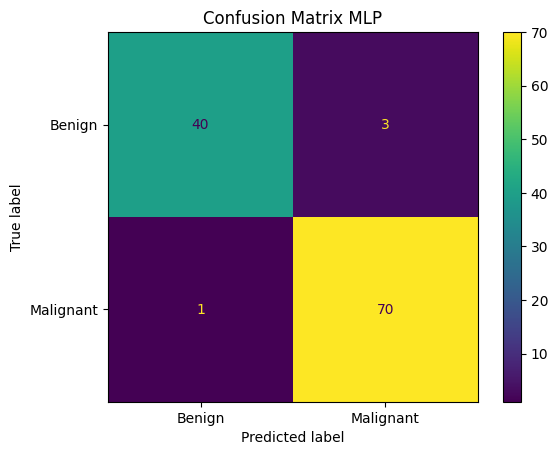

In [113]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant'])
cmd.plot()
plt.title('Confusion Matrix MLP')
plt.show()

# Conclusions from MLP analysis

Based on these results for the confusion matrix, I would conclude that the classification model is very accurate and has high performance on the test set.

# Results analysis

* True Positives (TP): The model accurately   predicted 70 malignant cases (actual positives).
* True Negatives (TN): The model accurately   predicted 41 benign cases (actual negatives).
* False Positives (FP): The model incorrectly predicted 2 benign cases as malignant.
* False Negatives (FN): The model incorrectly predicted 1 malignant case as benign.

* Accuracy 0.973 this means that the model predicted correctly 97.37% of the test samples
* Precision 
    * 0.9722 for positive (malignant) calculated by the formula TP/(TP + FP) giving a 97.22% of correctly predicted malignant samples
    * 0.9762 for negative (benignant) calculated by the formula TN/(TN + FN) giving a 97.62% of correctly predicted benign samples
* Recall 
    * 0.9859 Proportion of positive samples (malignant) that are correctly determined by the formula TP/(TP + FN) meaning 98.58% correct predictions
    * 0.9535 Proportion of negative samples (benign)    that are correctly determined by the formula FN/(FN + TN) meaning 95.35% correct predictions
* F1 score: The harmonic mean of precision and recall that measures the balance between them calculated by: 2 * (precision * recall) / (precision + recall)
    * positive (malignant): 0.9790 which means there's a high balance between precision and recall for the malignan samples
    * negative (benign):    0.9648 which means there's a high balance between precision and recall for the benign   samples

* The MLP approach to this dataset yields a very good overall score. The model effectively balances precision and recall, making it a robust choice for breast cancer prediction.

# Random Forest Approach
* We already have the dataset, X (data) and y (target)  test and training are already separated too. 
* ready to work!

In [114]:

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
RF_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [115]:
# Train the model
RF_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [116]:
# Make predictions on the test set

y_pred_RF = RF_classifier.predict(X_test)

print(y_pred_RF)


[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [117]:
# Evaluate the model

from sklearn.metrics import accuracy_score, classification_report


accuracy_RF = accuracy_score(y_test, y_pred_RF)

print(f"Random Forest Accuracy: {accuracy_RF:.2f}")

Random Forest Accuracy: 0.96


In [118]:
# Generate the confusion matrix

conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)

# Display the confusion matrix

print("RF Confusion Matrix:")
print(conf_matrix_RF)


RF Confusion Matrix:
[[40  3]
 [ 1 70]]


In [119]:
# Calculate precision score

precision_RF = precision_score(y_test, y_pred_RF)
print('RF Precision score:', precision_RF)

RF Precision score: 0.958904109589041


In [120]:
# Calculate Recall and f1

recall_RF = recall_score(y_test, y_pred_RF)
print("*----------------------------*")
print("RF Recall: ", recall_RF)
f1_RF = f1_score(y_test, y_pred_RF)
print("*----------------------------*")
print("RF f1: ", f1_RF)
print("*----------------------------*")

*----------------------------*
RF Recall:  0.9859154929577465
*----------------------------*
RF f1:  0.9722222222222222
*----------------------------*


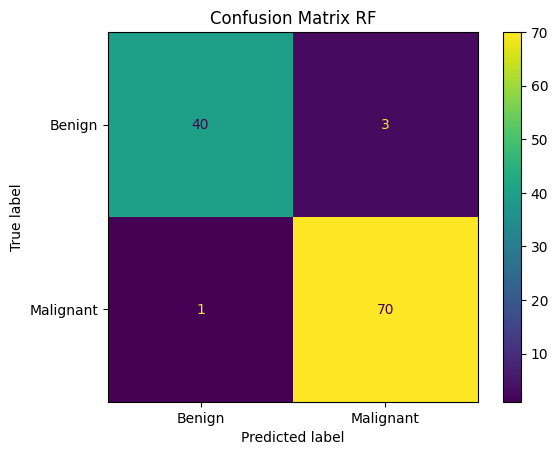

In [121]:
# Get the confusion matrix

cmd_RF = ConfusionMatrixDisplay(conf_matrix_RF, display_labels=['Benign', 'Malignant'])
cmd_RF.plot()
plt.title('Confusion Matrix RF')
plt.show()

# Conclusions from Random Forest analysis

Based on these results for the confusion matrix, I would conclude that the classification model is very accurate and has high performance on the test set.

# Results analysis

* True Positives (TP): The model accurately  predicted 70 malignant cases (actual positives).
* True Negatives (TN): The model accurately  predicted 40 benign cases (actual negatives).
* False Positives (FP): The model incorrectly predicted 3 benign cases as malignant.
* False Negatives (FN): The model incorrectly predicted 1 malignant case as benign.

* Accuracy 0.96 this means that the model predicted correctly 96% of the test samples
* Precision 
    * 0.95 for positive (malignant) calculated by the formula TP/(TP + FP) giving a 95% of correctly predicted malignant samples
    * 0.9756 for negative (benignant) calculated by the formula TN/(TN + FN) giving a 97.56% of correctly predicted benign samples
* Recall 
    * 0.9859 Proportion of positive samples (malignant) that are correctly determined by the formula TP/(TP + FN) meaning 98.59% correct predictions
    * 0.9756 Proportion of negative samples (benign)    that are correctly determined by the formula TN/(TN + FN) meaning 97.56% correct predictions
* F1 score: The harmonic mean of precision and recall that measures the balance between them calculated by: 2 * (precision * recall) / (precision + recall)
    * positive (malignant): 0.9722 which means there's a 97.22% balance between precision and recall for the malignan samples
    * negative (benign):    0.9756 which means there's a 97.56% balance between precision and recall for the benign   samples

* The Random Forest approach to this dataset yields a very good overall score. The model effectively balances precision and recall, making it a robust choice for breast cancer prediction.

# Logistic Regression LR


In [122]:
# Generate model

from sklearn.linear_model import LogisticRegression

# Train LR model

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [123]:
# Predictions

y_pred_LR = model_LR.predict(X_test)

print(y_pred_LR)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [124]:
# Calculate accuracy

accuracy_LR = accuracy_score(y_test, y_pred_LR)

print(f"Random Forest Accuracy: {accuracy_LR:.2f}")

Random Forest Accuracy: 0.98


In [125]:
# Calculate confusion matrix

conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)

# Display confusion matrix

print("Confusion Matrix LR:")
print(conf_matrix_LR)

Confusion Matrix LR:
[[41  2]
 [ 0 71]]


In [126]:
# Calculate precision

precision_LR = precision_score(y_test, y_pred_LR)
print('RF Precision score:', precision_LR)

RF Precision score: 0.9726027397260274


In [127]:
# Calculate recall and f1

recall_LR = recall_score(y_test, y_pred_LR)
print("*----------------------------*")
print("RF Recall: ", recall_LR)
f1_LR = f1_score(y_test, y_pred_LR)
print("*----------------------------*")
print("RF f1: ", f1_LR)
print("*----------------------------*")

*----------------------------*
RF Recall:  1.0
*----------------------------*
RF f1:  0.9861111111111112
*----------------------------*


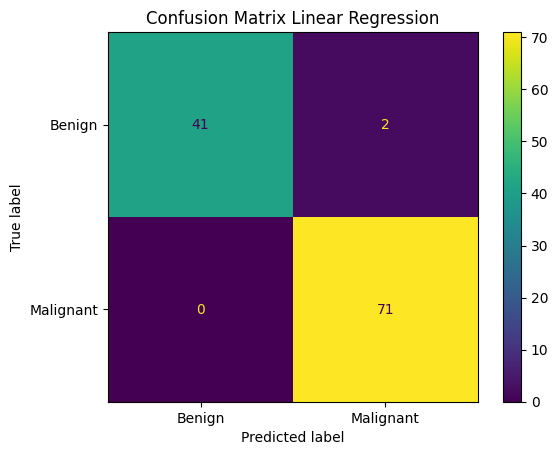

In [128]:
# Calculate confusion matrix for LR
# Plot confusion matrix for LR

cmd_LR = ConfusionMatrixDisplay(conf_matrix_LR, display_labels=['Benign', 'Malignant'])
cmd_LR.plot()
plt.title('Confusion Matrix Linear Regression')
plt.show()

# Conclusions from Logistic Regression analysis

Based on these results for the confusion matrix, I would conclude that the classification model is very accurate and has high performance on the test set.

# Results analysis

* True Positives (TP): The model correctly predicted 70 malignant cases (actual positives).
* True Negatives (TN): The model correctly predicted 41 benign cases (actual negatives).
* False Positives (FP): The model incorrectly predicted 2 benign cases as malignant.
* False Negatives (FN): The model incorrectly predicted 0 malignant case as benign.

* Accuracy 0.98 this means that the model predicted correctly 98% of the test samples
* Precision 
    * 0.97 for positive (malignant) calculated by the formula TP/(TP + FP) giving a 97% of correctly predicted malignant samples
    * 1 for negative (benignant) calculated by the formula TN/(TN + FN) giving a 100% of correctly predicted benign samples
* Recall 
    * 1 Proportion of positive samples (malignant) that are correctly determined by the formula TP/(TP + FN) meaning 100% correct predictions
    * 1 Proportion of negative samples (benign)    that are correctly determined by the formula TN/(TN + FN) meaning 100% correct predictions
* F1 score: The harmonic mean of precision and recall that measures the balance between them calculated by: 2 * (precision * recall) / (precision + recall)
    * positive (malignant): 0.9861 which means there's a 98.61% balance between precision and recall for the malignan samples
    * negative (benign):    1 which means there's a 100% balance between precision and recall for the benign   samples

* The Linear approach to this dataset yields a perfect score for screening cancer tests as it would not confuse FN diagnosis. The abscense of false negatives is crucial for patient survival

# Results Summary

In [129]:
# make a Summary table for confusion matrix
column_names_cm = ['Model', 'TN','FP','FN', 'TP']

tn1, fp1, fn1, tp1 = cm.ravel()
tn2, fp2, fn2, tp2 = conf_matrix_RF.ravel()
tn3, fp3, fn3, tp3 = conf_matrix_LR.ravel()

cm_MLP_res          =   ['MLP', tn1, fp1, fn1, tp1]
conf_matrix_RF_res  =   ['RF', tn2, fp2, fn2, tp2]
conf_matrix_LR_res  =   ['LR', tn3, fp3, fn3, tp3]

data_res = [cm_MLP_res, conf_matrix_RF_res, conf_matrix_LR_res] 

df_res = pd.DataFrame(data= data_res, columns=column_names_cm)

# make a summary table for model index

column_names_index = ['Model', 'Acc','Pres+','Recall+','f1+']

index_MLP = ['MLP', round(accuracy,    4), round(precision,    4), round(recall,    4), round(f1,    4)]
index_RF  = ['RF' , round(accuracy_RF, 4), round(precision_RF, 4), round(recall_RF, 4), round(f1_RF, 4)]
index_LR  = ['LR' , round(accuracy_LR, 4), round(precision_LR, 4), round(recall_LR, 4), round(f1_LR, 4)]

index_data = [index_MLP, index_RF, index_LR]

df_index_resume = pd.DataFrame(columns=column_names_index, data=index_data)

print('***-----------------------------------------------------***')
print('***---------------CONFUSION MATRIX----------------------***')
print(df_res)
print('***-----------------------------------------------------***')
print('***-----------------------------------------------------***')
print('***---------------MODEL INDEX SUMMARY-------------------***')
print(df_index_resume)
print('***-----------------------------------------------------***')
print('***-----------------------------------------------------***')


***-----------------------------------------------------***
***---------------CONFUSION MATRIX----------------------***
  Model  TN  FP  FN  TP
0   MLP  40   3   1  70
1    RF  40   3   1  70
2    LR  41   2   0  71
***-----------------------------------------------------***
***-----------------------------------------------------***
***---------------MODEL INDEX SUMMARY-------------------***
  Model     Acc   Pres+  Recall+     f1+
0   MLP  0.9649  0.9589   0.9859  0.9722
1    RF  0.9649  0.9589   0.9859  0.9722
2    LR  0.9825  0.9726   1.0000  0.9861
***-----------------------------------------------------***
***-----------------------------------------------------***


# FINAL CONCLUSIONS

Based on the gathered results we can assert the following:

* All three models perform well, but let’s focus on minimizing false negatives (FN) since missing malignant cases is critical.
* Logistic Regression (LR) stands out:
    * It achieves perfect recall (100%) for malignant cases, meaning it correctly identifies all malignant samples.
    * The F1 score (harmonic mean of precision and recall) is also high (0.9861).
    * LR has the least combination between FP and FN (2, 0) from the models
* Therefore, Logistic Regression appears to be the best model for the proposed Breast Cancer Wisconsin dataset, emphasizing its ability to minimize false negatives and accurately predict malignant cases.